# 分析多个网络的表现，并推测出最佳的结果，展示出有问题结果的图像
- 学习pandas
- 学习seaborn
- 学习数据分析

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [42]:
# 读取网络计算的结果
df = pd.read_csv("test_raw_result.csv")
print(df.head())

               id  c1  c2  c3  c4  c5  c6  c7  c8  c9  c10  c11  c12
0  test_00000.png   1   1   4   1   1   0   1   0   0    1    1    0
1  test_00001.png   2   2   2   2   2   0   1   0   0    0    0    0
2  test_00002.png   5   5   5   5   5   0   5   1   5    1    1    5
3  test_00003.png   0   0   0   0   0   0   1   1   0    0    1    0
4  test_00004.png   2   2   2   2   2   0   1   1   0    1    0    0


## 分析数据
- 直方图(distplot), 结果表明，**c1-c5是有效的结果**，其他的网络预测的结果就是一坨，后面的网络为什么会这么差呢？
- 成对的散点图（pairplot)，看不出什么结果

下一步需要分析的是：
- 为什么后面的网络预测失效？
- 怎么才能得到更高的准确率？

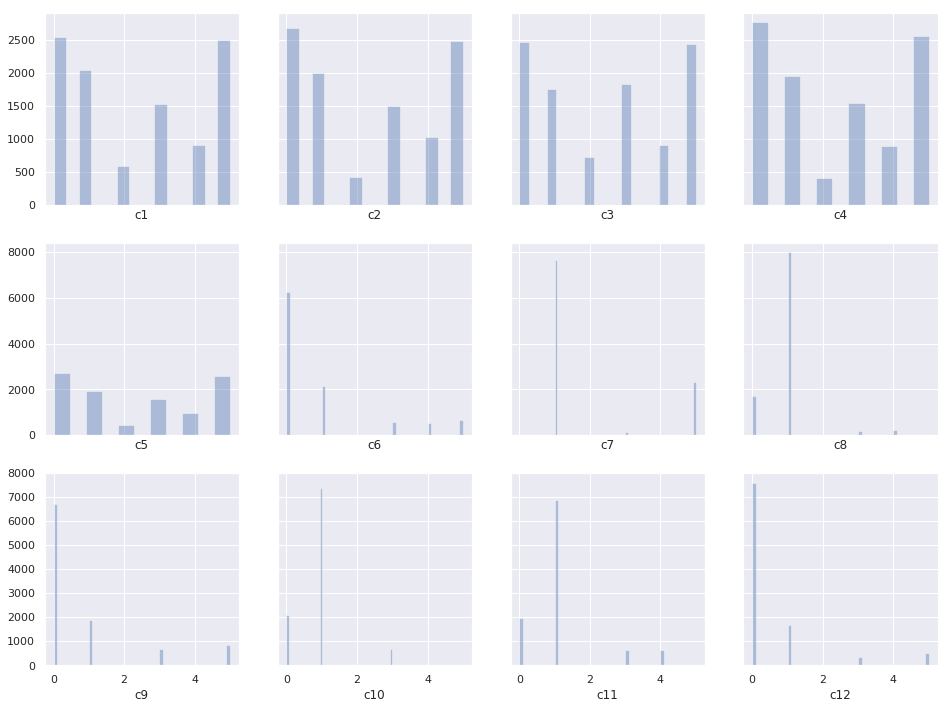

In [71]:
fig, ax = plt.subplots(3, 4, sharex='col', sharey='row',figsize=(16,12))

m = 1
for i in range(3):
    for j in range(4):
        sns.distplot(df[df.columns[m]],kde=False,ax=ax[i,j])
        m = m+1

# plt.figure(figsize=(32,32))
# g = sns.pairplot(df.iloc[:,1:4],hue="c1")

## 后面网络失效的原因分析
- 测试数据分布不均匀，其实训练数据也是不均匀的，存在数据偏斜的问题，data imbalance，偏斜比率最高达到6.75
- 训练数据太少～500张/类，学习的参数过多。极其容易过拟合，**主要因素**
- dense net 可能比ResNet在这个问题上更弱点。

## 如何改善结果指标
- 重新调整训练数据分布
- 使用更多的ResNet网络集成
- 使用半监督的学习
- 对于集成结果有争议的数据，引入仲裁

In [91]:
# 继续学习，统计c1-c5预测结果一致性的分布
new_df = df.loc[:,["c1","c2","c3","c4","c5"]]
data_numpy = new_df.values.astype(np.int64)

max_val =[]
max_ind = []
for data in data_numpy:
    max_val.append(np.argmax(np.bincount(data)))
    max_ind.append(np.max(np.bincount(data)))

new_df["max_val"] = max_val
new_df["max_count"] = max_ind
print(new_df.head())
print("分布：")
print(new_df.groupby(by="max_count").count())
# sns.distplot(new_df.max_count,kde=False)


   c1  c2  c3  c4  c5  max_val  max_count
0   1   1   4   1   1        1          4
1   2   2   2   2   2        2          5
2   5   5   5   5   5        5          5
3   0   0   0   0   0        0          5
4   2   2   2   2   2        2          5
分布：
             c1    c2    c3    c4    c5  max_val
max_count                                       
2            36    36    36    36    36       36
3           350   350   350   350   350      350
4          1073  1073  1073  1073  1073     1073
5          8683  8683  8683  8683  8683     8683


## 原来有173个分错的
应该是集中在 得分比较低的36个和350个中间

In [99]:
print(df[new_df.max_count==2].iloc[:,:6])

                   id  c1  c2  c3  c4  c5
68     test_00068.png   1   4   2   1   4
75     test_00075.png   1   3   3   0   1
920    test_00920.png   1   0   3   0   1
1010   test_01010.png   3   1   3   5   5
1117   test_01117.png   1   4   0   1   0
1678   test_01678.png   1   5   3   1   5
1747   test_01747.png   1   4   3   1   4
2483   test_02483.png   1   5   1   0   0
2529   test_02529.png   2   2   4   3   4
2651   test_02651.png   1   0   4   0   1
3615   test_03615.png   1   0   3   0   3
3874   test_03874.png   1   5   3   1   5
3975   test_03975.png   1   4   3   1   3
4000   test_04000.png   3   1   2   3   2
4318   test_04318.png   3   1   2   2   3
4343   test_04343.png   1   4   3   4   1
4697   test_04697.png   3   4   3   1   1
4789   test_04789.png   0   0   4   3   3
4911   test_04911.png   1   5   3   1   5
5274   test_05274.png   1   5   3   1   5
5444   test_05444.png   3   4   3   1   4
5521   test_05521.png   1   4   2   1   4
5942   test_05942.png   1   5   0 